# Hito 2: Minería de Datos - Grupo 17
## Integrantes:
- Claudio Morel - Sección 1
- Damián Gonzalez - Sección 1
- Francisco Márquez - Sección 1
- Joaquín Gonzalez - Sección 1
- Nicolás Soto - Sección 2

# Introducción: plantear el problema y la motivación.

La pandemia de COVID-19 ha dejado en evidencia una problemática que ha persistido durante mucho tiempo: la escasez de camas hospitalarias para atender a todos los pacientes. En Chile hay un total de 37,397 camas hospitalarias de diferentes niveles de atención, lo que equivale a 1.92 camas por cada 1,000 habitantes. Esto muestra una escasez de camas hospitalarias en comparación con el promedio de los países de la OCDE, que es de 3.6 camas por cada 1,000 habitantes. Esta situación ha subrayado la necesidad urgente de contar con herramientas que permitan gestionar de manera eficiente los recursos del sistema hospitalario.
 
Motivado por la realidad del sistema de salud pública en Chile, marcado por largos tiempos de espera y colapsos en la entrega de servicios básicos en situaciones críticas, surge la necesidad de buscar formas de anticipar y planificar la distribución de recursos y personal de manera efectiva. En respuesta a esta necesidad, se ha emprendido un proyecto de minería de datos que analiza un conjunto de datos de egresos hospitalarios de los años 2020, 2021 y 2022, proporcionados por el Ministerio de salud del gobierno de Chile, con el objetivo de identificar relaciones y patrones que permitan abordar el problema mencionado y mejorar la capacidad de respuesta del sistema de salud ante situaciones similares en el futuro.

# Exploración de datos

## Limpieza y manipulación de datos

Para el proyecto se trabajó con datasets extraídos de la página del ministerio de salud de Chile. Estos datasets contienen información con respecto a los egresos hospitalarios ocurridos durante un año determinado. Se tienen características tanto del paciente como del proceso en sí. Por ejemplo, con respecto al paciente tenemos su etnia, sexo, grupo etario, país de origen, comuna y ciudad de residencia, pertenencia al sistema nacional de salud, y el tipo de previsión. En cuanto al proceso en sí, se tiene el año de egreso, la cantidad de días de estadía, el diagnóstico principal, la condición de egreso del paciente (si sobrevivió o no), y por último, si el paciente fue intervenido quirúrgicamente o no.

En un principio se tuvo 3 datasets, correspondientes a los años 2020, 2021 y 2022, los cuales fueron reunidos en un solo dataset principal. Este dataset final contiene alrededor de 4 millones de tuplas y cada paciente cuenta con 18 atributos. 


In [201]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
dataset_2022 = pd.read_csv('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2022\\EGRE_DATOS_ABIERTOS_2022.csv', delimiter=';',encoding='latin1')
dataset_2021 = pd.read_csv('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2021\\EGRE_DATOS_ABIERTOS_2021.csv', delimiter=';',encoding='latin1')
dataset_2020 = pd.read_csv('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2020\\EGRE_DATOS_ABIERTOS_2020.csv', delimiter=';',encoding='latin1')


C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1211327584.py:9: DtypeWarning: Columns (7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2022 = pd.read_csv('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2022\\EGRE_DATOS_ABIERTOS_2022.csv', delimiter=';',encoding='latin1')
C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1211327584.py:10: DtypeWarning: Columns (7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2021 = pd.read_csv('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2021\\EGRE_DATOS_ABIERTOS_2021.csv', delimiter=';',encoding='latin1')
C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1211327584.py:11: DtypeWarning: Columns (7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2020 = pd.read_csv('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2020\\EGRE_DATOS_ABIERTOS_2020.csv', delimiter=';',encoding='latin1')


Primero incluimos las librerías necesarias e importamos los archivos csv con los datos (Las rutas solo funcionan en la máquina local)

In [202]:
dataset_2022['INTERV_Q'] = dataset_2022['GLOSA_INTERV_Q_PPAL'].apply(lambda x: 2 if pd.isna(x) else 1)
dataset_2022['PROCED'] = dataset_2022['GLOSA_PROCED_PPAL'].apply(lambda x: 2 if pd.isna(x) else 1)
dataset_2022 = dataset_2022.drop(['GLOSA_INTERV_Q_PPAL','GLOSA_PROCED_PPAL'],axis=1)


En el código anterior, lo  que se hizo fue generar los valores tanto de las categorías INTERV_Q y PROCED del dataset correspondiente al año 2022 utilizando los valores de la columna GLOSA_INTERVAL_Q_PPAL. Esto se hizo debido a que en los datasets de los años 2020 y 2021 no se tenían estas  categorías. De esta forma, modificamos los datasets para que todos tengan las mismas columnas y sea posible concatenarlos.

In [203]:
dataset_2020 = dataset_2020[dataset_2020['PERTENENCIA_ESTABLECIMIENTO_SALUD']!='*']
dataset_2021 = dataset_2021[dataset_2021['PERTENENCIA_ESTABLECIMIENTO_SALUD']!='*']
dataset_2022 = dataset_2022[dataset_2022['PERTENENCIA_ESTABLECIMIENTO_SALUD']!='*']
ds = pd.concat([dataset_2020, dataset_2021, dataset_2022], ignore_index=True)

Aquí, se concatenan los datasets de los 3 años estudiados, para trabajar con un dataset común de todos los datos. Esto no será problema para el análisis temporal de los datos, dado que cada paciente tiene un atributo de 'ANO_EGRESO' que nos permite identificar a que año pertenece el dato. Además, previo a hacer la concatenación, se filtran todos los datos llenados parcialmente, esto pues luego de hacer un análisis de cada csv, existen una cantidad no menor de datos con sus atributos fijados con un valor "*". De esta forma se filtran, todas las tuplas que con estas características.

In [204]:
diagns = pd.read_excel('C:\\Users\\joako\\Documents\\Tareas\\mineria\\EGRESOS_2022\\Diccionario_BD_egresos_hospitalario.xlsx', sheet_name='codigo CIE-10', skiprows=8) # Las filas se cuentan desde 0, por lo que debes restar 1 al número de la fila desde la que quieres empezar a leer
mapping_dict = diagns.set_index('CODIGO SUBCATEGORIA')['GLOSA CAPITULO'].to_dict()
ds['DIAG1'] = ds['DIAG1'].map(mapping_dict)
print(ds['DIAG1'].nunique())


21


Los diagnósticos presentes en el dataset, son muy específicos teniendo sobre 7000 valores distintos. Por lo tanto, con tal de poder estudiar y visualizar el comportamiento de estos datos, nos pareció prudente generalizar estos diagnósticos utilizando el diccionario de diagnósticos que viene incluido en conjunto con los csv de cada año. Así, intercambiamos los valores de 'CODIGO_SUBCATEGORIA' por los valores de 'GLOSA GRUPO', así reduciendo a un poco más de 200 valores únicos.

Luego, se realizó la tarea de identificar outliers, en donde se encontró que existen pacientes con una cantidad de días de estadía anormal, lo cual dificulta la correcta visualización de este atributo. En modo de ejemplo, vemos el caso de una mujer con casi 20.000 días, teniendo solo 20 a 29 años, lo que reulta ser una incoherencia.

In [205]:
dias = ds['DIAS_ESTADA'].max()
print(str(dias)+" dias!")
años = dias//365
print(str(años)+" años!!!")
ds[ds['DIAS_ESTADA']==dias]

19477 dias!
53 años!!!


,PERTENENCIA_ESTABLECIMIENTO_SALUD,SEXO,GRUPO_EDAD,ETNIA,GLOSA_PAIS_ORIGEN,COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,REGION_RESIDENCIA,GLOSA_REGION_RESIDENCIA,PREVISION,GLOSA_PREVISION,ANO_EGRESO,DIAG1,DIAG2,DIAS_ESTADA,CONDICION_EGRESO,INTERV_Q,PROCED
1544582,Pertenecientes al Sistema Nacional de Servicio...,MUJER,20 a 29,No se identifica con alguna etnia,Chileno,13201,Puente Alto,13,Metropolitana de Santiago,1,FONASA,2021,"Síntomas, signos y hallazgos anormales clínico...",NaN,19477,1,2,2


Y tiene 20 a 29 años!!!!!

Para resolver esto, se tomó la decisión de truncar los valores del atributo 'DIAS_ESTADA'. Sin embargo, existe una serie de problemas al hacer esto, ya que no se quiere perder los valores reales de los pacientes y tampoco se quiere perder la capacidad de realizar consultas de datos agregados (Algo que se pierde si truncamos con un valor no numerico como un String). Así, creamos las series ds_numeric y ds_categorical, los cuales tiene los valores de 'DIAS_ESTADA' truncados luego de los 10 días (Puesto que la gran mayoría está entre 1 a 10 días). En el numeric se reemplazan los valores mayores a 10 con un 11, y en categorical se reemplazan con un String que indica "10+". Así, posteriormente podemos utilizar tanto ds, ds_numeric o ds_categorical dependiendo de que queramos hacer (Y sin perder los datos originales). Además, cambiamos los datos de la columna "PERTENENCIA_ESTABLECIMIENTO_SALUD" para que su valor no sea un string si no un int indicando si pertenece o no. Esto tiene sentido ya que es un atributo binario.

In [206]:
cols = ['ANO_EGRESO','DIAS_ESTADA','PREVISION']
ds_numeric = ds.copy()
ds_categorical = ds.copy()
for col in cols:
    ds_numeric[col] = ds_numeric[col].apply(lambda x: int(x))
ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'] = ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'].apply(lambda x: 2 if x=='No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS' else 1)

In [207]:
ds_numeric['DIAS_ESTADA'] = ds_numeric['DIAS_ESTADA'].apply(lambda x: 11 if x>10 else x) # aqui dejamos los valores sobre 10 como 11 por mientras
ds_categorical['DIAS_ESTADA'] = ds_categorical['DIAS_ESTADA'].apply(lambda x: "10+" if x>10 else x)

Luego de truncar los datos, podemos visualizar como este proceso ayudó a una mejor visualización de esta variable. Primero vemos un gráfico tipo "Box-Plot" utilizando la serie sin truncar "ds", en el cual se ven muchos puntos distantes y fuera del rango intercuartil (El cual es casi inexistente a la vista). Luego usando la serie "ds_numeric", vemos un claro rangointercuartil y ya no exites outliers.

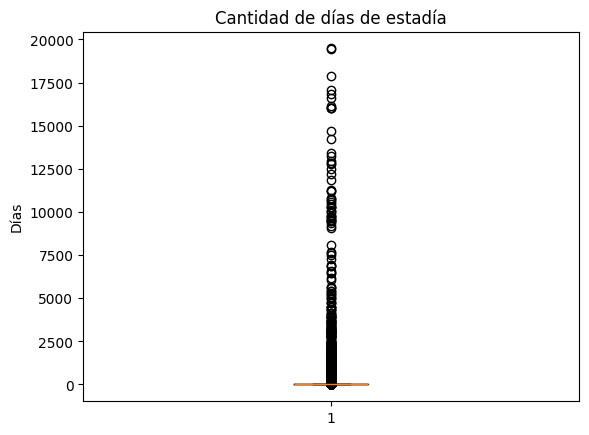

In [208]:
dias_estada = ds['DIAS_ESTADA']

plt.boxplot(dias_estada)
plt.title("Cantidad de días de estadía")
plt.ylabel("Días")
plt.show()

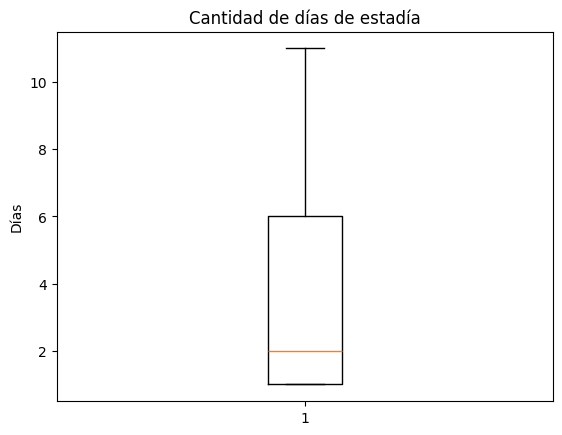

In [209]:
dias_estada = ds_numeric['DIAS_ESTADA']

plt.boxplot(dias_estada)
plt.title("Cantidad de días de estadía")
plt.ylabel("Días")
plt.show()

## Visualización de datos

Una vez realizada la limpieza de los datos, se procede a realizar una visualización general de los mismos. Esto fue necesario para asegurarnos de que fueran lo suficientemente representativos y observar cómo estaban distribuidos, con el fin de poder formular preguntas interesantes.

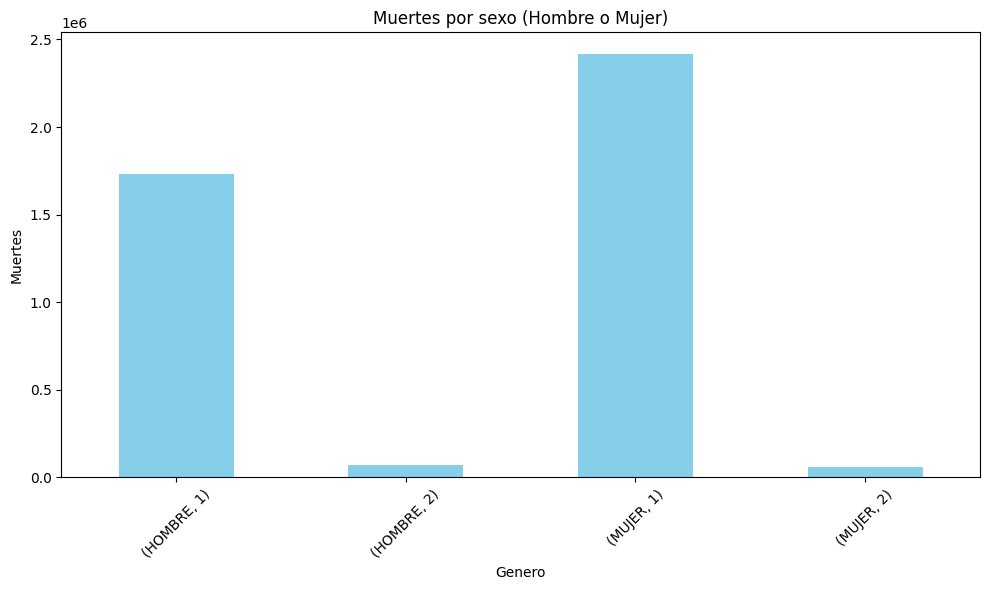

In [210]:
mortalidad = ds[ds['SEXO'].isin(['HOMBRE', 'MUJER'])].groupby('SEXO')['CONDICION_EGRESO'].value_counts()
plt.figure(figsize=(10, 6))
mortalidad.plot(kind='bar', color='skyblue')
plt.xlabel('Genero')
plt.ylabel('Muertes')
plt.title('Muertes por sexo (Hombre o Mujer)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como se puede observar, se elaboró un gráfico de barras para examinar la condición de egreso de los pacientes clasificados por sexo. Cabe destacar que se tomó la decisión de no incluir a las personas no binarias, debido a la escasez de datos sobre este grupo. De hecho, la falta de información era tal que no se registraron fallecimientos de personas no binarias, además de tener una presencia prácticamente nula. A pesar de no ser consideradas en este gráfico, sí están incluidas en todos los demás análisis.

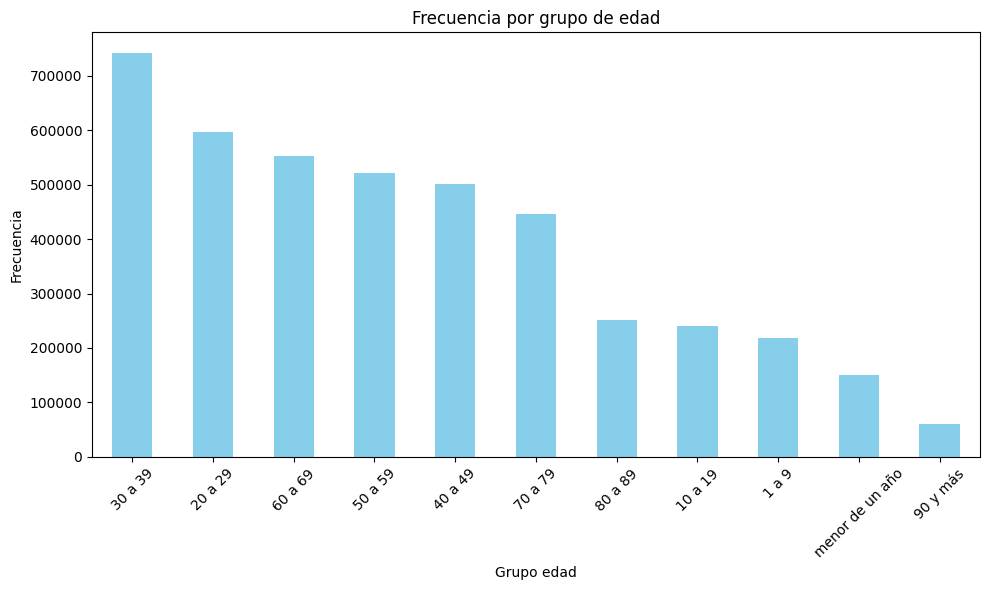

In [211]:
value_counts = ds['GRUPO_EDAD'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por grupo de edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El histograma muestra la distribución de grupos etarios, desde infantes menores de un año hasta personas mayores de 90 años, con un grupo para cada década, a excepción de los dos grupos mencionados anteriormente. Se observa una tendencia hacia las personas de entre 30 y 39 años, además de notar que entre los 20 y los 79 años se registra una mayor frecuencia que en los grupos fuera de ese rango de edad.

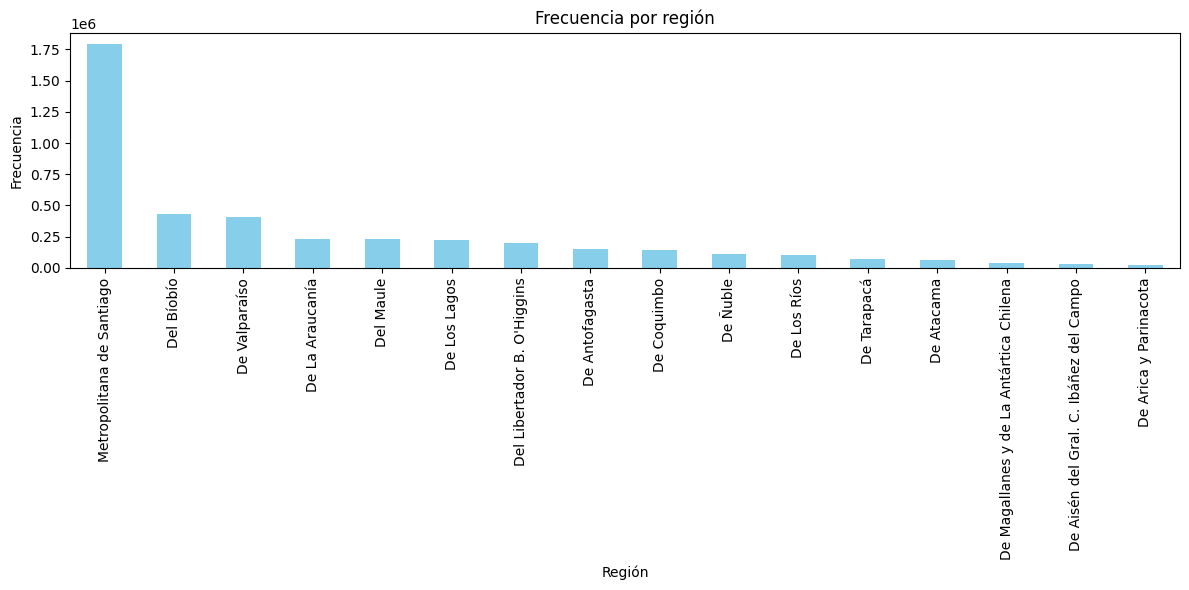

In [212]:
value_counts = ds['GLOSA_REGION_RESIDENCIA'].value_counts()

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por región')
plt.tight_layout()
plt.show()

El histograma de frecuencias por región muestra una clara tendencia en la Región Metropolitana, lo cual es esperable debido a su gran cantidad de habitantes en comparación con las demás regiones.

Para analizar estos datos de mejor manera normalizaremos la frecuencia de cada región por su cantidad de habitantes, para esto buscaremos este dato en el censo de 2017 con el fin de crear el diccionario 'poblacion'

In [213]:
poblacion = {
    'De Tarapacá': 330558,
    'De Antofagasta': 607534,
    'De Atacama': 	286168,
    'De Coquimbo': 757586,
    'De Valparaíso': 1815902,
    'Del Libertador B. O\'Higgins': 914555,
    'Del Maule': 1044950,
    'Del Bíobío': 1556805,
    'De La Araucanía': 957224,
    'De Los Lagos': 828708,
    'De Aisén del Gral. C. Ibáñez del Campo': 103158,
    'De Magallanes y de La Antártica Chilena': 166533,
    'Metropolitana de Santiago': 7112808,
    'De Los Ríos': 384837,
    'De Arica y Parinacota': 226068,
    'De Ñuble': 480609
}

C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1769783062.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25197151392249023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_value_counts[region] = value_counts[region] / poblacion[region]


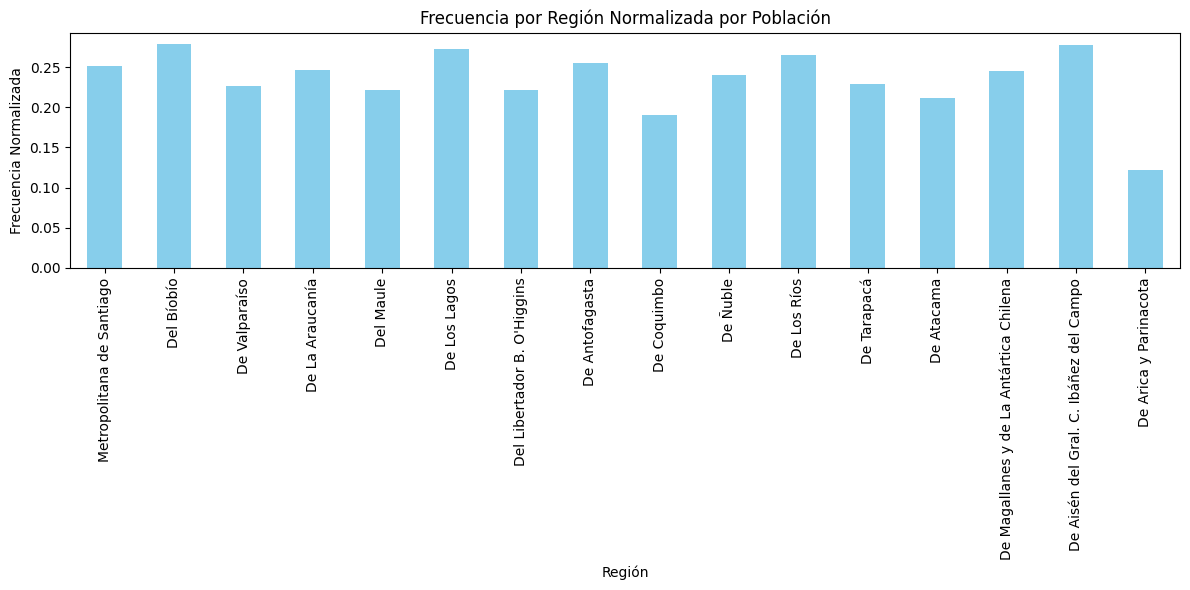

In [214]:
value_counts = ds['GLOSA_REGION_RESIDENCIA'].value_counts()

normalized_value_counts = value_counts.copy()
for region in value_counts.index:
    normalized_value_counts[region] = value_counts[region] / poblacion[region]

plt.figure(figsize=(12, 6))
normalized_value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Frecuencia Normalizada')
plt.title('Frecuencia por Región Normalizada por Población')
plt.tight_layout()
plt.show()

## Relaciones entre los datos

A continuación se muestra un gráfico en el que se puede ver la distribución de días de estadía de las personas conforme a si estas han sido intervenidas quirúrgicamente o no. Notamos que, considerando a las personas no operadas, la diferencia entre aquellas que solo pasan un día y aquellas que pasan más de 10 días es mucho menor con respecto a la diferencia de aquellas personas que sí han sido operadas, en donde se observa que cerca del 45% de las personas tienen una estadía de un día, mientras que menos de un 10% tiene una estadía de más de 10 días. En el caso de las personas no operadas ambos resultados son cercanos al 20% (22% aprox para 1 día de estadía y 17% aprox para una cantidad de días mayor a 10). Con esto, es posible concluir que las operaciones son relevantes al momento de considerar la cantidad de días de estadía de un paciente.

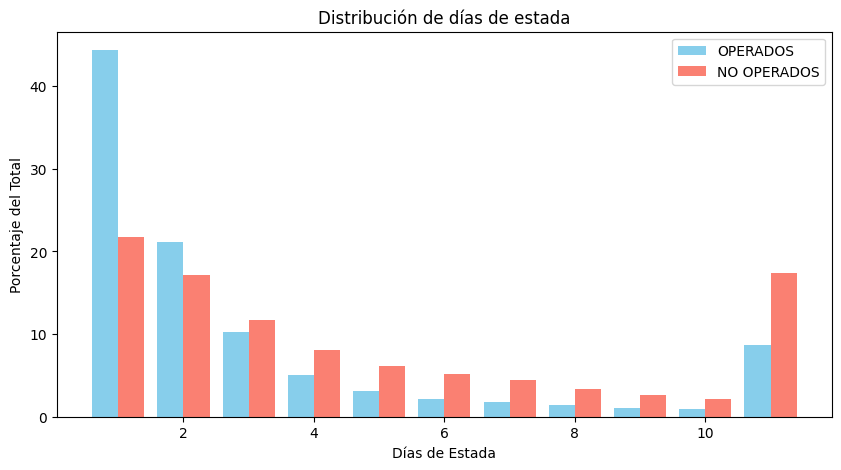

In [215]:
ds_op = ds_numeric[ds_numeric['INTERV_Q'] == 1]['DIAS_ESTADA']
ds_nop = ds_numeric[ds_numeric['INTERV_Q'] == 2]['DIAS_ESTADA']

ds_op_counts = ds_op.value_counts()
ds_nop_counts = ds_nop.value_counts()

total_op = ds_op_counts.sum()
total_nop = ds_nop_counts.sum()
ds_op_percentages = ds_op_counts / total_op * 100
ds_nop_percentages = ds_nop_counts / total_nop * 100

plt.figure(figsize=(10, 5))

plt.bar(ds_op_percentages.index - 0.2, ds_op_percentages.values, width=0.4, color='skyblue', label='OPERADOS')
plt.bar(ds_nop_percentages.index + 0.2, ds_nop_percentages.values, width=0.4, color='salmon', label='NO OPERADOS')

plt.title('Distribución de días de estada')
plt.xlabel('Días de Estada')
plt.ylabel('Porcentaje del Total')
plt.legend()

plt.show()

De manera similar al gráfico anterior, en este también se puede observar la distribución de días, esta vez considerando la pertenencia del paciente al sistema nacional de salud (SNS). Aquí, considerando al grupo que no pertenecen al SNS, se puede observar claramente que la diferencia entre la cantidad de personas que pasan un día en el establecimiento (cerca del 50% del total) y aquellas que pasan más de 10 días (menos del 10%) es mucho mayor que en el caso de las personas que sí pertenecen al SNS, donde ambos porcentajes son relativamente similares (cerca del 20%). Luego también se distingue que la pertenencia al SNS es relevante al momento de analizar la cantidad de días de estadía.

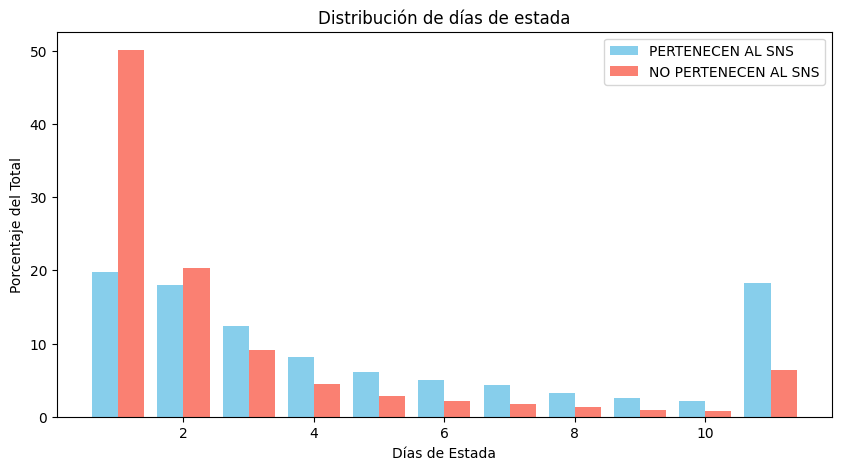

In [216]:
ds_ssn = ds_numeric[ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'] == 1]['DIAS_ESTADA']
ds_nssn = ds_numeric[ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'] == 2]['DIAS_ESTADA']
ds_ssn_counts = ds_ssn.value_counts()
ds_nssn_counts = ds_nssn.value_counts()
total_ssn = ds_ssn_counts.sum()
total_nssn = ds_nssn_counts.sum()
ds_ssn_percentages = ds_ssn_counts / total_ssn * 100
ds_nssn_percentages = ds_nssn_counts / total_nssn * 100

plt.figure(figsize=(10, 5))
plt.bar(ds_ssn_percentages.index - 0.2, ds_ssn_percentages.values, width=0.4, color='skyblue', label='PERTENECEN AL SNS')
plt.bar(ds_nssn_percentages.index + 0.2, ds_nssn_percentages.values, width=0.4, color='salmon', label='NO PERTENECEN AL SNS')

plt.title('Distribución de días de estada')
plt.xlabel('Días de Estada')
plt.ylabel('Porcentaje del Total')
plt.legend()

plt.show()

Este bloque de código se centra en analizar y visualizar las diferencias en las estadías hospitalarias entre pacientes que fueron operados y aquellos que no lo fueron, desglosado por regiones de Chile. El análisis comienza con la agrupación de los datos del conjunto de egresos hospitalarios, calculando la estadía promedio para cada combinación de región y categoría de intervención quirúrgica.

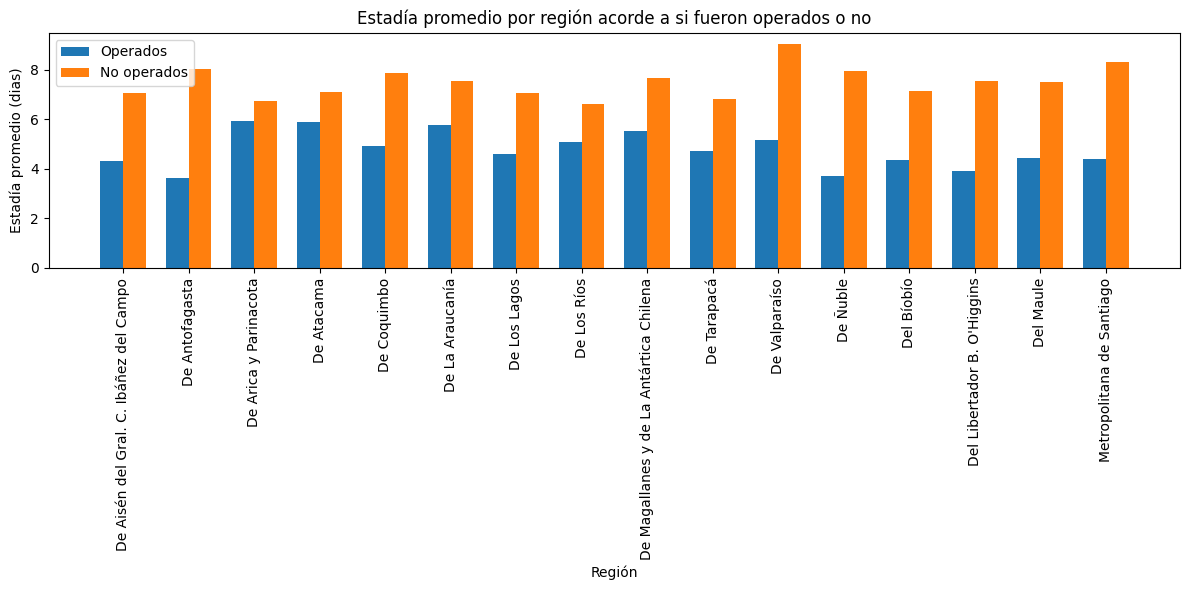

In [217]:

avg_days_table = ds.groupby(['GLOSA_REGION_RESIDENCIA', 'INTERV_Q'])['DIAS_ESTADA'].mean().reset_index()
avg_days_pivot = avg_days_table.pivot_table(index='GLOSA_REGION_RESIDENCIA', columns='INTERV_Q', values='DIAS_ESTADA', fill_value=0)
avg_days_pivot.reset_index(inplace=True)
num_bars = avg_days_pivot.shape[0]
bar_width = 0.35
x = np.arange(num_bars)
regions = avg_days_pivot['GLOSA_REGION_RESIDENCIA']
interq_1_data = avg_days_pivot[1]
interq_2_data = avg_days_pivot[2]


plt.figure(figsize=(12, 6))
plt.bar(x, interq_1_data, width=bar_width, label='Operados')
plt.bar(x + bar_width, interq_2_data, width=bar_width, label='No operados')
plt.xlabel('Región')
plt.ylabel('Estadía promedio (dias)')
plt.title('Estadía promedio por región acorde a si fueron operados o no')
plt.xticks(x + bar_width / 2, regions, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


El gráfico resultante muestra claramente si existen diferencias significativas en la duración de las estadías entre los dos grupos de pacientes a lo largo de las regiones, facilitando así la identificación de patrones o necesidades específicas de gestión hospitalaria. Esta visualización es crucial para los administradores hospitalarios y los planificadores de políticas de salud, proporcionando una base sólida para tomar decisiones informadas sobre la asignación de recursos y la mejora de los protocolos de atención.

A continuación, vemos la frecuencia de enfermedades para todas las cantidades de estadía posibles en nuestro dataframe ds_categorical. Para cada valor disinto, guardamos las frecuencias por enfermedad en una lista.

In [218]:
unique_values = ds_categorical['DIAS_ESTADA'].unique().tolist()
int_values = [val for val in unique_values if isinstance(val, int)]
str_value = [val for val in unique_values if isinstance(val, str)]
int_values.sort()
unique_values = int_values + str_value
dias = []
for dia in unique_values:
    ds_dias = ds_categorical[ds_categorical['DIAS_ESTADA']==dia]
    dias.append((ds_dias['DIAG1'].value_counts(),dia) )

Por último, con el objetivo de visualizar y comprender la caracterización de los distintos días de estadía en relación con las enfermedades que llevan a estos períodos, a continuación se muestran gráficos de torta para mostrar la distribución de los diagnósticos más comunes para diferentes las distintas cantidades de días que se quedan los pacientes (Utilizando ds_categorical). Cada gráfico de torta representa un día de estadía específico y muestra los 10 diagnósticos más frecuentes durante ese período. Los colores en los gráficos de torta se asignan de manera consistente para cada diagnóstico en todos los gráficos, lo que facilita la comparación entre los diferentes períodos de estadía. Cada sector del gráfico de torta representa un diagnóstico y el tamaño del sector indica la proporción de casos asociados con ese diagnóstico en el período de estadía correspondiente.

C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1824553693.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)
C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1824553693.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)
C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1824553693.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)
C:\Users\joako\AppData\Local\Temp\ipykernel_7976\1824553693.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)
C:\Users\joako\AppData\Local\Temp\ip

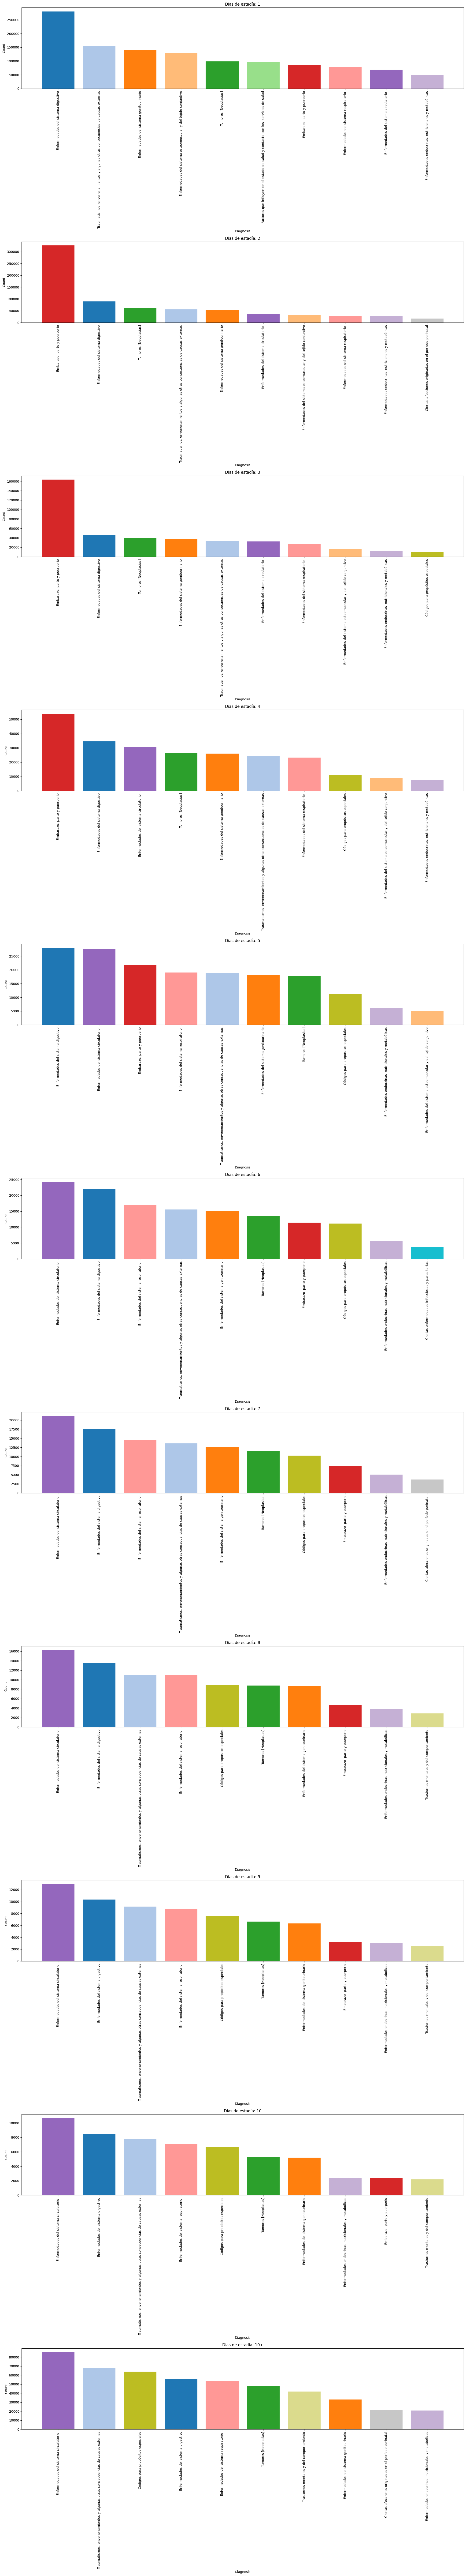

In [219]:
unique_values = ds_categorical['DIAS_ESTADA'].unique().tolist()
int_values = [val for val in unique_values if isinstance(val, int)]
str_values = [val for val in unique_values if isinstance(val, str)]
int_values.sort()
unique_values = int_values + str_values

dias = []
for dia in unique_values:
    ds_dias = ds_categorical[ds_categorical['DIAS_ESTADA'] == dia]
    dias.append((ds_dias['DIAG1'].value_counts(), dia))

all_diagnoses = pd.concat([dia[0] for dia in dias])
unique_diagnoses = all_diagnoses.index.unique()
color_map = {diag: plt.cm.tab20(i % 20) for i, diag in enumerate(unique_diagnoses)}

fig, axes = plt.subplots(nrows=len(dias), ncols=1, figsize=(20, 10 * len(dias)))
for i, ax in enumerate(np.ravel(axes)):
    data = dias[i][0][:10]
    colors = [color_map[diag] for diag in data.index]
    ax.bar(data.index, data.values, color=colors)
    ax.set_title("Días de estadía: " + str(dias[i][1]))
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel("Count")
    ax.set_xticklabels(data.index, rotation=90)

# Ajusta el espacio en la parte inferior para acomodar los nombres de las enfermedades
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

Con estos gráficos se puede empezar a crear una relación entre los diagnosticos y el tiempo de estadía del paciente.

# Preguntas y problemas

La capacidad de predecir la duración de la estadía de un paciente adquiere una relevancia crucial. Esta predicción proporciona un entendimiento más profundo de cuán saturado puede estar un hospital, en relación con su tasa de ocupación, y cómo esta situación podría evolucionar en el futuro.

Al comprender mejor la duración esperada de la estadía de los pacientes, los administradores hospitalarios pueden anticipar y planificar de manera más efectiva la distribución de recursos, como camas, personal médico y suministros. Esta anticipación permite una respuesta más ágil a las necesidades de atención médica de la población, evitando la saturación y mejorando la calidad del servicio ofrecido.

De estas maneras las preguntas a responder durante el transcurso del proyecto serán:

¿Se puede predecir la cantidad de días de estadía de un paciente sabiendo su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica? Clasificación - Damián

¿Se pueden clasificar los pacientes en grupos con distinto nivel de urgencia de atención según  su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica? Clusters - Cachis

¿Cuáles son los factores que influyen en la condición de egreso del paciente (si sobrevive o no) considerando variables como edad, sexo, región, pertenencia al sistema nacional de salud, diagnóstico principal y si fue intervenido quirúrgicamente? Random forest - Pancho


# Aportes personales

Para lograr completar el proyecto, el equipo de trabajo se repartió las labores de la siguiente manera:

Claudio Morel: Desarrollo el componente visual  de la presentación grupal, realizó los gráficos de "Operados y No operados" y "Pertenecientes y no pertenecientes al SNS" y también concretó las preguntas finales del proyecto. Además ayudó a la limpieza y modificación de atributos y con la redacción general del informe.

Damián Gonzalez: Aportó al analisis inicial de los datos, ayudando a identificar la motivación. Además, se dedicó a explicar y crear los gráficos generados en la sección de exploracción de datos. Además ayudó a la limpieza y modificación de atributos y con la redacción general del informe.

Joaquín Gonzalez: Desarrollo y explico el apartado de visualización de la exploración y además aportó en la creación general de los gráficos del proyecto. Además ayudó a la redacción general del informe.

Nicolás Soto: Se dedicó en gran parte a la implementación técnica para la creación de gráficos y ayudó a la explicación del código asociado a esto. Además ayudó a la redacción general del informe.

Francisco Márquez: Trabajó principalmente en la manipulación directa de los datos, generando los filtraciones de datos y la reasignación de valores de los atributos. También generó código para la creación de los gráficos, en particular para ilustrar la limpieza (Gráficos de boxplot) y el gráfico de "Estadía promedio por región". Además ayudó a la redacción general del informe.

# Hito 2

## ¿Se puede predecir la cantidad de días de estadía de un paciente sabiendo su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica?

Para poder realizar esta clasificación, en primer lugar definimos 3 clases con el fin de dar un mejor margen de predicción al modelo. Nuestras clases objetivo serán:

- 1-3 días: Estancia Corta
- 4-8 días: Estancia Media
- 9 días o más: Estancia Larga

Ahora, para el modelo utilizaremos las características de rango etario, sexo, pertenencia al sistema de salud nacional, diagnóstico, operación y región. La inclusión de la región se debe a que, aunque la frecuencia por región normalizada por la cantidad de habitantes no varíe significativamente, se observa que la región puede afectar la estadía del paciente dependiendo de si fue operado o no.

Este modelo será entrenado utilizando una partición de 70-30 de los datos. Para encontrar los mejores parámetros posibles, utilizaremos diferentes algoritmos de clasificación vistos en el curso.

En primer lugar, se realizará un mapeo de los atributos que no sean valores numéricos, además de la creación de las clases mencionadas anteriormente. Luego, se llevará a cabo una búsqueda en cuadrícula (GridSearch) con un subconjunto del dataset para cada modelo, con el objetivo de encontrar los parámetros óptimos para el entrenamiento del modelo. Se realizará una comparación de las métricas de los modelos con el subconjunto de datos, para finalmente entrenar los algoritmos seleccionados con los mejores resultados utilizando el dataset completo.

Los modelos resultantes de estas técnicas serán evaluados con métricas como precisión, recall, F1-score y matrices de confusión.

1. Mapeo de datos

Transformamos el sexo del paciente tal que es 1 si es hombre, 2 si es mujer y 3 si es indeterminado

In [220]:
ds_exp = ds_numeric
ds_exp['SEXO'] = ds_exp['SEXO'].apply(lambda x: 1 if x == 'HOMBRE' else 2 if x == 'MUJER' else 3 if x == 'INTERSEX (INDETERMINDADO)' else x)

Como los grupos etarios son un string que describe el rango utilizamos un diccionario para convertirlos en un string

In [221]:
mapeo_edades = {
    'menor de un año': 0,
    '1 a 9': 1,
    '10 a 19': 2,
    '20 a 29': 3,
    '30 a 39': 4,
    '40 a 49': 5,
    '50 a 59': 6,
    '60 a 69': 7,
    '70 a 79': 8,
    '80 a 89': 9,
    '90 y más': 10
}

ds_numeric['GRUPO_EDAD'] = ds_numeric['GRUPO_EDAD'].map(mapeo_edades)

Utilizando los valores unique de le asignamos un id a cada diagnóstico

In [222]:
mapeo_diagnostico = {
    'Malformaciones congénitas, deformidades y anomalías cromosómicas': 1,
    'Factores que influyen en el estado de salud y contacto con los  servicios de salud': 2,
    'Enfermedades del sistema genitourinario': 3,
    'Enfermedades del sistema respiratorio ': 4,
    'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas': 5,
    'Enfermedades de la piel y del tejido subcutáneo': 6,
    'Enfermedades del ojo y sus anexos ': 7,
    'Enfermedades del sistema digestivo': 8,
    'Enfermedades del sistema circulatorio ': 9,
    'Ciertas enfermedades infecciosas y parasitarias': 10,
    'Enfermedades del sistema osteomuscular y del tejido conjuntivo': 11,
    'Enfermedades del sistema nervioso central': 12,
    'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ': 13,
    'Enfermedades endocrinas, nutricionales y metabólicas': 14,
    'Códigos para propósitos especiales': 15,
    'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte': 16,
    'Tumores [Neoplasias]': 17,
    'Enfermedades del oído y de la apófisis mastoides': 18,
    'Trastornos mentales y del comportamiento': 19,
    'Ciertas afecciones originadas en el período perinatal': 20,
    'Embarazo, parto y puerperio': 21
}

ds_numeric['DIAG1'] = ds_numeric['DIAG1'].map(mapeo_diagnostico)

Detectamos que algunas regiones tenían su número como string, por lo que transformamos los valores a int

In [223]:
ds_exp['REGION_RESIDENCIA'] = ds_exp['REGION_RESIDENCIA'].apply(lambda x: int(x))

Finalmente dropeamos los valores con diagnóstico NaN

In [224]:
ds_exp = ds_exp.dropna(subset=['DIAG1'])

También para hacer más fácil el entrenamiento de los modelos dropeamos las columnas que no se ocupan para el entrenamiento

In [225]:
features = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'REGION_RESIDENCIA', 'DIAG1', 'INTERV_Q']
target = 'DIAS_ESTADA'

columns_to_drop = [col for col in ds_exp.columns if col not in features + [target]]

ds_exp = ds_exp.drop(columns=columns_to_drop)

Antes de entrenar debes verificar si nuestras clases estan desbalanceadas

In [226]:
conteo = ds_numeric["DIAS_ESTADA"].value_counts()

corta = conteo.loc[1:3].sum()
media = conteo.loc[4:8].sum()
larga = conteo.loc[9:].sum()

print(f'Estancia Corta: {corta}')
print(f'Estancia Media: {media}')
print(f'Estancia Larga: {larga}')

Estancia Corta: 3226876
Estancia Media: 904171
Estancia Larga: 150843


Para manejar el desbalanceo, aplicaremos oversampling y subsampling. El entrenamiento se realizará en tres conjuntos.

2. GridSearch

Para buscar los hiperparámetros, utilizaremos un subsample de 100,000 datos para hacer esta tarea menos costosa, además de crear las clases objetivos.

In [227]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

features = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'REGION_RESIDENCIA', 'DIAG1', 'INTERV_Q']
target = 'DIAS_ESTADA'

sample_size = 100000

ds_sample = ds_exp.sample(n=sample_size, random_state=0)

data = ds_sample[features + [target]]

clases = {
    'Estancia Corta': [1, 2, 3],
    'Estancia Media': [4, 5, 6, 7, 8],
    'Estancia Larga': list(range(9, max(data[target]) + 1))
}


data['DIAS_ESTADA'] = pd.cut(data['DIAS_ESTADA'], bins=[0, 3, 8, float('inf')], labels=clases.keys(), right=False)

X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


Creamos conjuntos de entrenamiento con oversampling.

In [228]:

X_train_oversampled = X_train.reset_index(drop=True)
y_train_oversampled = y_train.reset_index(drop=True)

num_instances_majority_class = y_train_oversampled.value_counts().max()

for class_name in y_train_oversampled.unique():
    if (y_train_oversampled == class_name).sum() < num_instances_majority_class:
        idx = np.random.choice(y_train_oversampled[y_train_oversampled == class_name].index, size=num_instances_majority_class - (y_train_oversampled == class_name).sum())
        X_train_oversampled = pd.concat([X_train_oversampled, X_train_oversampled.loc[idx]])
        y_train_oversampled = pd.concat([y_train_oversampled, y_train_oversampled.loc[idx]])


Creamos conjuntos de entrenamiento con subsampling.

In [229]:

X_train_subsampled = X_train.reset_index(drop=True)
y_train_subsampled = y_train.reset_index(drop=True)

num_instances_minority_class = y_train_subsampled.value_counts().min()

for class_name in y_train_subsampled.unique():
    if (y_train_subsampled == class_name).sum() > num_instances_minority_class:
        idx = np.random.choice(y_train_subsampled[y_train_subsampled == class_name].index, size=(y_train_subsampled == class_name).sum() - num_instances_minority_class, replace=False)
        X_train_subsampled = X_train_subsampled.drop(idx)
        y_train_subsampled = y_train_subsampled.drop(idx)

Reasignamos los conjuntos de datos de entrenamiento a nombres más cortos para simplificar el código.

In [230]:
# datos entrenamiento "originales"
X_orig = X_train
y_orig = y_train

# datos entrenamiento "oversampleados"
X_over = X_train_oversampled
y_over = y_train_oversampled

# datos entrenamiento "subsampleados"
X_subs = X_train_subsampled
y_subs = y_train_subsampled

GridSearch de Decision Tree en el conjunto de datos originales.

In [231]:
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = {'criterion': ['gini', 'entropy'],
                    'max_depth': [3, 5, 7, 10]}

score = 'f1_weighted'

clf_orig = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    cv=10,
    scoring=score
)

clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(clf_orig.best_params_)

y_pred_orig = clf_orig.predict(X_test)
clf_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))

Mejor combinación de parámetros (original):
{'criterion': 'entropy', 'max_depth': 10}
                precision    recall  f1-score   support

Estancia Corta       0.66      0.80      0.73     15301
Estancia Larga       0.46      0.36      0.41      5799
Estancia Media       0.43      0.34      0.38      8900

      accuracy                           0.58     30000
     macro avg       0.52      0.50      0.50     30000
  weighted avg       0.56      0.58      0.56     30000



GridSearch de Decision Tree en el conjunto de datos oversampling.

In [232]:
clf_over = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    cv=10,
    scoring=score
)

clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(clf_over.best_params_)

y_pred_over = clf_over.predict(X_test)
clf_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'criterion': 'entropy', 'max_depth': 10}
                precision    recall  f1-score   support

Estancia Corta       0.78      0.57      0.66     15301
Estancia Larga       0.39      0.68      0.49      5799
Estancia Media       0.42      0.41      0.41      8900

      accuracy                           0.54     30000
     macro avg       0.53      0.55      0.52     30000
  weighted avg       0.60      0.54      0.55     30000



GridSearch de Decision Tree en el conjunto de datos subsampling.

In [233]:
clf_subs = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    cv=10,
    scoring=score
)

clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(clf_subs.best_params_)

y_pred_subs = clf_subs.predict(X_test)
clf_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'criterion': 'entropy', 'max_depth': 10}
                precision    recall  f1-score   support

Estancia Corta       0.77      0.60      0.67     15301
Estancia Larga       0.38      0.71      0.50      5799
Estancia Media       0.41      0.34      0.37      8900

      accuracy                           0.54     30000
     macro avg       0.52      0.55      0.51     30000
  weighted avg       0.59      0.54      0.55     30000



Comparamos accuracy de los conjuntos.

In [234]:
print("Accuracy (original):", clf_acc_orig)
print("Accuracy (oversampling):", clf_acc_over)
print("Accuracy (subsampling):", clf_acc_subs)

Accuracy (original): 0.5783333333333334
Accuracy (oversampling): 0.5417666666666666
Accuracy (subsampling): 0.5430333333333334


GridSearch de Naive Bayes en el conjunto de datos original.

In [235]:
from sklearn.naive_bayes import GaussianNB

tuned_parameters = {'var_smoothing': np.logspace(0, -9, num=100)}

score = 'f1_weighted'

nb_clf_orig = GridSearchCV(
    GaussianNB(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

nb_clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(nb_clf_orig.best_params_)

y_pred_orig = nb_clf_orig.predict(X_test)
nb_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))

Mejor combinación de parámetros (original):
{'var_smoothing': 0.0005336699231206307}
                precision    recall  f1-score   support

Estancia Corta       0.63      0.71      0.67     15301
Estancia Larga       0.37      0.35      0.36      5799
Estancia Media       0.36      0.29      0.32      8900

      accuracy                           0.52     30000
     macro avg       0.45      0.45      0.45     30000
  weighted avg       0.50      0.52      0.51     30000



GridSearch de Naive Bayes en el conjunto de datos oversampling.

In [236]:
nb_clf_over = GridSearchCV(
    GaussianNB(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

nb_clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(nb_clf_over.best_params_)

y_pred_over = nb_clf_over.predict(X_test)
nb_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'var_smoothing': 0.006579332246575682}
                precision    recall  f1-score   support

Estancia Corta       0.70      0.59      0.64     15301
Estancia Larga       0.33      0.64      0.44      5799
Estancia Media       0.35      0.23      0.28      8900

      accuracy                           0.49     30000
     macro avg       0.46      0.49      0.45     30000
  weighted avg       0.53      0.49      0.49     30000



GridSearch de Naive Bayes en el conjunto de datos subsampling.

In [237]:
nb_clf_subs = GridSearchCV(
    GaussianNB(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

nb_clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(nb_clf_subs.best_params_)

y_pred_subs = nb_clf_subs.predict(X_test)
nb_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'var_smoothing': 0.006579332246575682}
                precision    recall  f1-score   support

Estancia Corta       0.70      0.59      0.64     15301
Estancia Larga       0.33      0.65      0.44      5799
Estancia Media       0.35      0.23      0.28      8900

      accuracy                           0.50     30000
     macro avg       0.46      0.49      0.45     30000
  weighted avg       0.53      0.50      0.50     30000



Comparamos accuracy de los conjuntos.

In [238]:
print("Accuracy (original):", nb_acc_orig)
print("Accuracy (oversampling):", nb_acc_over)
print("Accuracy (subsampling):", nb_acc_subs)

Accuracy (original): 0.5180333333333333
Accuracy (oversampling): 0.49466666666666664
Accuracy (subsampling): 0.4955333333333333


GridSearch de Random Forest en el conjunto de datos original.

In [239]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = {'n_estimators': [100, 200, 300], 
                    'max_depth': [None, 10, 20, 30],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]}

score = 'f1_weighted'

rd_clf_orig = GridSearchCV(
    RandomForestClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score,
    n_jobs=-1
)

rd_clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(rd_clf_orig.best_params_)

y_pred_orig = rd_clf_orig.predict(X_test)
rd_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))


Mejor combinación de parámetros (original):
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
                precision    recall  f1-score   support

Estancia Corta       0.65      0.82      0.73     15301
Estancia Larga       0.48      0.36      0.41      5799
Estancia Media       0.43      0.32      0.36      8900

      accuracy                           0.58     30000
     macro avg       0.52      0.50      0.50     30000
  weighted avg       0.55      0.58      0.56     30000



GridSearch de Random Forest en el conjunto de datos oversampling.

In [240]:
rd_clf_over = GridSearchCV(
    RandomForestClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score,
    n_jobs=-1
)

rd_clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(rd_clf_over.best_params_)

y_pred_over = rd_clf_over.predict(X_test)
rd_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
                precision    recall  f1-score   support

Estancia Corta       0.75      0.59      0.66     15301
Estancia Larga       0.38      0.60      0.46      5799
Estancia Media       0.40      0.40      0.40      8900

      accuracy                           0.53     30000
     macro avg       0.51      0.53      0.51     30000
  weighted avg       0.58      0.53      0.55     30000



GridSearch de Random Forest con los en el conjunto de datos subsampling.

In [241]:
rd_clf_subs = GridSearchCV(
    RandomForestClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score,
    n_jobs=-1
)

rd_clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(rd_clf_subs.best_params_)

y_pred_subs = rd_clf_subs.predict(X_test)
rd_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
                precision    recall  f1-score   support

Estancia Corta       0.78      0.57      0.66     15301
Estancia Larga       0.37      0.75      0.50      5799
Estancia Media       0.42      0.33      0.37      8900

      accuracy                           0.54     30000
     macro avg       0.52      0.55      0.51     30000
  weighted avg       0.59      0.54      0.54     30000



Comparamos accuracy de los conjuntos.

In [242]:
print("Accuracy (original):", rd_acc_orig)
print("Accuracy (oversampling):", rd_acc_over)
print("Accuracy (subsampling):", rd_acc_subs)

Accuracy (original): 0.5806
Accuracy (oversampling): 0.534
Accuracy (subsampling): 0.5364


GridSearch de K-Nearest Neighbors en el conjunto de datos original.

In [243]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = {'n_neighbors': [1, 3, 5, 10],
                    'weights': ['uniform', 'distance']}

score = 'f1_weighted'

kn_clf_orig = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

kn_clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(kn_clf_orig.best_params_)

y_pred_orig = kn_clf_orig.predict(X_test)
kn_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))


Mejor combinación de parámetros (original):
{'n_neighbors': 10, 'weights': 'uniform'}
                precision    recall  f1-score   support

Estancia Corta       0.65      0.80      0.72     15301
Estancia Larga       0.44      0.40      0.42      5799
Estancia Media       0.41      0.27      0.33      8900

      accuracy                           0.56     30000
     macro avg       0.50      0.49      0.49     30000
  weighted avg       0.54      0.56      0.54     30000



GridSearch de K-Nearest Neighbors en el conjunto de datos oversampling.

In [244]:
kn_clf_over = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

kn_clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(kn_clf_over.best_params_)

y_pred_over = kn_clf_over.predict(X_test)
kn_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'n_neighbors': 10, 'weights': 'distance'}
                precision    recall  f1-score   support

Estancia Corta       0.66      0.75      0.70     15301
Estancia Larga       0.40      0.43      0.41      5799
Estancia Media       0.39      0.29      0.33      8900

      accuracy                           0.55     30000
     macro avg       0.49      0.49      0.48     30000
  weighted avg       0.53      0.55      0.54     30000



GridSearch de K-Nearest Neighbors en el conjunto de datos subsampling.

In [245]:
kn_clf_subs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

kn_clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(kn_clf_subs.best_params_)

y_pred_subs = kn_clf_subs.predict(X_test)
kn_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'n_neighbors': 10, 'weights': 'uniform'}
                precision    recall  f1-score   support

Estancia Corta       0.72      0.63      0.67     15301
Estancia Larga       0.37      0.64      0.47      5799
Estancia Media       0.40      0.30      0.34      8900

      accuracy                           0.53     30000
     macro avg       0.50      0.52      0.49     30000
  weighted avg       0.56      0.53      0.53     30000



Comparamos accuracy de los conjuntos.

In [246]:
print("Accuracy (original):", kn_acc_orig)
print("Accuracy (oversampling):", kn_acc_over)
print("Accuracy (subsampling):", kn_acc_subs)

Accuracy (original): 0.5646666666666667
Accuracy (oversampling): 0.5511333333333334
Accuracy (subsampling): 0.5334666666666666


Clasificador trivial utilizado como punto de comparación.

In [247]:
from sklearn.dummy import DummyClassifier
dm_clf = DummyClassifier(strategy='stratified')

dm_clf.fit(X_train, y_train)

y_pred = dm_clf.predict(X_test)

dm_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Estancia Corta       0.51      0.51      0.51     15301
Estancia Larga       0.19      0.19      0.19      5799
Estancia Media       0.29      0.29      0.29      8900

      accuracy                           0.38     30000
     macro avg       0.33      0.33      0.33     30000
  weighted avg       0.38      0.38      0.38     30000



Comparación de los modelos con los 3 conjuntos de entrenamiento.

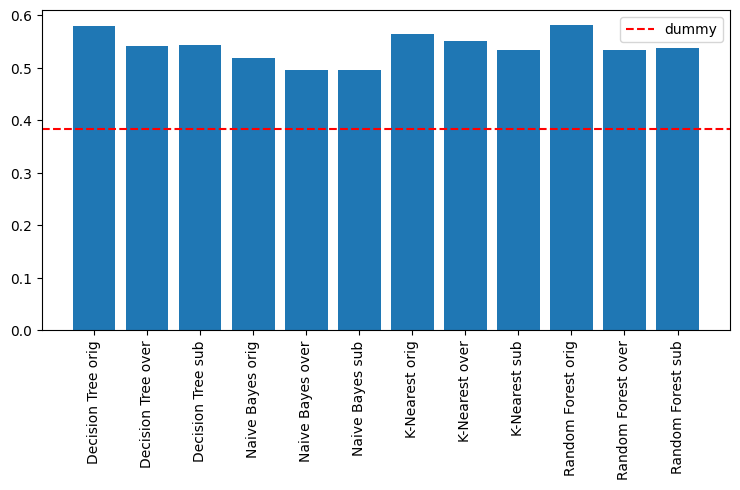

In [248]:
dt_acc = accuracy_score(y_test, clf_orig.predict(X_test))

fig, ax = plt.subplots(figsize=(7.5, 5))

accuracies = [clf_acc_orig, clf_acc_over, clf_acc_subs,  nb_acc_orig, nb_acc_over, nb_acc_subs, kn_acc_orig, kn_acc_over, kn_acc_subs, rd_acc_orig, rd_acc_over, rd_acc_subs]
classifires = ['Decision Tree orig', 'Decision Tree over', 'Decision Tree sub','Naive Bayes orig', 'Naive Bayes over', 'Naive Bayes sub','K-Nearest orig',
               'K-Nearest over', 'K-Nearest sub', 'Random Forest orig', 'Random Forest over', 'Random Forest sub']

ax.bar(classifires, accuracies)
ax.axhline(dm_acc, color='r', linestyle='--', label='dummy')

ax.legend()

plt.xticks(rotation=90, ha='center')
plt.tight_layout() 
plt.show()

Se puede observar cómo los modelos de Decision Tree, Random Forest y K-Nearest Neighbors obtuvieron mejor accuracy. Es por esto que utilizaremos estos tres para probar el dataset completo, utilizando los 3 conjuntos de entrenamiento.

3. Entrenamiento de modelos

Volveremos a crear los conjuntos de entrenamiento utilizando todo el dataset para obtener mejores resultados.

In [249]:
features = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'REGION_RESIDENCIA', 'DIAG1', 'INTERV_Q']
target = 'DIAS_ESTADA'

data = ds_exp[features + [target]]

clases = {
    'Estancia Corta': [1, 2, 3],
    'Estancia Media': [4, 5, 6, 7, 8],
    'Estancia Larga': list(range(9, max(data[target]) + 1))
}


data['DIAS_ESTADA'] = pd.cut(data['DIAS_ESTADA'], bins=[0, 3, 8, float('inf')], labels=clases.keys(), right=False)

X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


Creamos conjuntos de entrenamiento con oversampling.

In [250]:
X_train_oversampled = X_train.reset_index(drop=True)
y_train_oversampled = y_train.reset_index(drop=True)

num_instances_majority_class = y_train_oversampled.value_counts().max()

for class_name in y_train_oversampled.unique():
    if (y_train_oversampled == class_name).sum() < num_instances_majority_class:
        idx = np.random.choice(y_train_oversampled[y_train_oversampled == class_name].index, size=num_instances_majority_class - (y_train_oversampled == class_name).sum())
        X_train_oversampled = pd.concat([X_train_oversampled, X_train_oversampled.loc[idx]])
        y_train_oversampled = pd.concat([y_train_oversampled, y_train_oversampled.loc[idx]])


Creamos conjuntos de entrenamiento con subsampling.

In [251]:
X_train_subsampled = X_train.reset_index(drop=True)
y_train_subsampled = y_train.reset_index(drop=True)

num_instances_minority_class = y_train_subsampled.value_counts().min()

for class_name in y_train_subsampled.unique():
    if (y_train_subsampled == class_name).sum() > num_instances_minority_class:
        idx = np.random.choice(y_train_subsampled[y_train_subsampled == class_name].index, size=(y_train_subsampled == class_name).sum() - num_instances_minority_class, replace=False)
        X_train_subsampled = X_train_subsampled.drop(idx)
        y_train_subsampled = y_train_subsampled.drop(idx)


Reasignamos los conjuntos de datos de entrenamiento a nombres más cortos para simplificar el código.

In [252]:
# datos entrenamiento "originales"
X_orig = X_train
y_orig = y_train

# datos entrenamiento "oversampleados"
X_over = X_train_oversampled
y_over = y_train_oversampled

# datos entrenamiento "subsampleados"
X_subs = X_train_subsampled
y_subs = y_train_subsampled

Entrenamiento de modelo Random Forest en el conjunto de datos original.

In [253]:
best_params={'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': -1}

rf_clf_orig = RandomForestClassifier(**best_params)

rf_clf_orig.fit(X_orig, y_orig)

y_pred_rf_orig = rf_clf_orig.predict(X_test)

rf_acc_orig = accuracy_score(y_test, y_pred_rf_orig)

print("ORIGINAL::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_rf_orig))

ORIGINAL::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.66      0.82      0.73    651795
Estancia Larga       0.48      0.39      0.43    250173
Estancia Media       0.45      0.33      0.38    381537

      accuracy                           0.59   1283505
     macro avg       0.53      0.51      0.51   1283505
  weighted avg       0.56      0.59      0.57   1283505



Entrenamiento de modelo Random Forest en el conjunto de datos oversampling.

In [254]:
best_params={'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}

rf_clf_over = RandomForestClassifier(**best_params)

rf_clf_over.fit(X_over, y_over)

y_pred_rf_over = rf_clf_over.predict(X_test)

rf_acc_over = accuracy_score(y_test, y_pred_rf_over)

print("OVERSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_rf_over))

OVERSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.59      0.68    651795
Estancia Larga       0.40      0.73      0.52    250173
Estancia Media       0.43      0.39      0.41    381537

      accuracy                           0.56   1283505
     macro avg       0.54      0.57      0.54   1283505
  weighted avg       0.61      0.56      0.57   1283505



Entrenamiento de modelo Random Forest en el conjunto de datos subsampling.

In [255]:
best_params={'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1}

rf_clf_subs = RandomForestClassifier(**best_params)

rf_clf_subs.fit(X_subs, y_subs)

y_pred_rf_subs = rf_clf_subs.predict(X_test)

rf_acc_subs = accuracy_score(y_test, y_pred_rf_subs)

print("SUBSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_rf_subs))

SUBSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.58      0.67    651795
Estancia Larga       0.38      0.77      0.51    250173
Estancia Media       0.42      0.33      0.37    381537

      accuracy                           0.55   1283505
     macro avg       0.53      0.56      0.52   1283505
  weighted avg       0.60      0.55      0.55   1283505



Comparamos accuracy de los conjuntos

In [256]:
print("Accuracy (original):", rf_acc_orig)
print("Accuracy (oversampling):", rf_acc_over)
print("Accuracy (subsampling):", rf_acc_subs)

Accuracy (original): 0.5880140708450687
Accuracy (oversampling): 0.5588969267747301
Accuracy (subsampling): 0.5452740737278


Para poder comparar de manera más visual los resultados del modelo, crearemos una matriz de confusión para cada conjunto de entrenamiento.

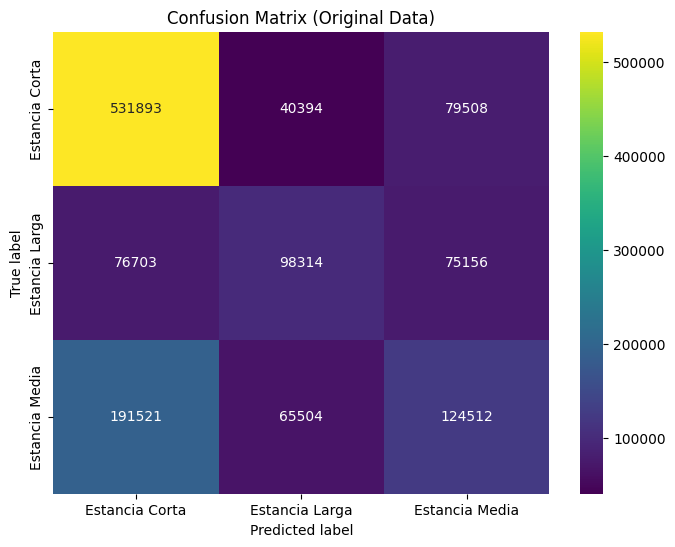

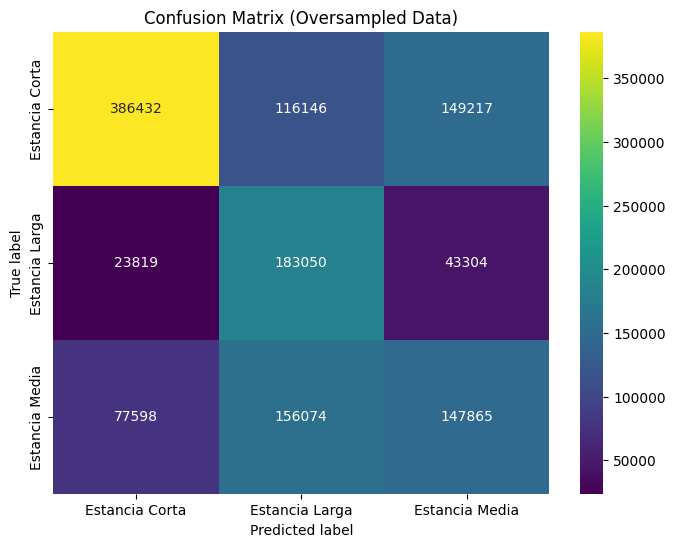

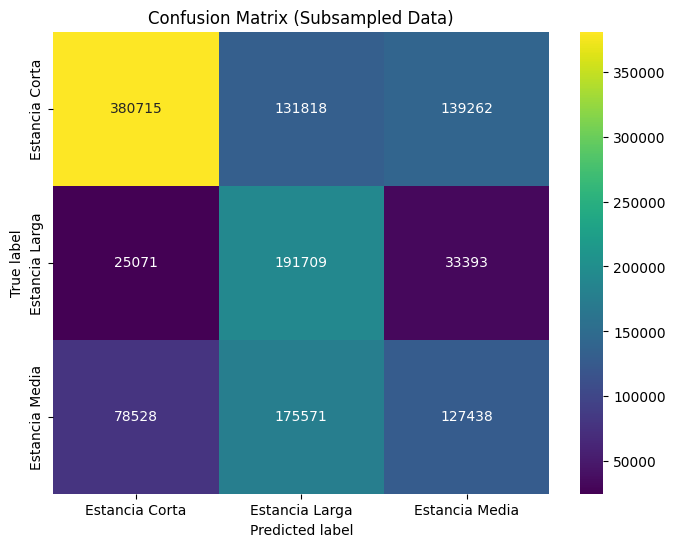

In [264]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm_orig = confusion_matrix(y_test, y_pred_rf_orig)
cm_over = confusion_matrix(y_test, y_pred_rf_over)
cm_subs = confusion_matrix(y_test, y_pred_rf_subs)

classes = unique_labels(y_test, y_pred_rf_orig, y_pred_rf_over, y_pred_rf_subs)

def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.show()

plot_confusion_matrix(cm_orig, 'Confusion Matrix (Original Data)')
plot_confusion_matrix(cm_over, 'Confusion Matrix (Oversampled Data)')
plot_confusion_matrix(cm_subs, 'Confusion Matrix (Subsampled Data)')

Entrenamiento de modelo K-Nearest Neighbors en el conjunto de datos original.

In [258]:
best_params={'n_neighbors': 10, 'weights': 'uniform', 'n_jobs': -1}

knn_clf_orig = KNeighborsClassifier(**best_params)

knn_clf_orig.fit(X_orig, y_orig)

y_pred_knn_orig = knn_clf_orig.predict(X_test)

knn_acc_orig = accuracy_score(y_test, y_pred_knn_orig)

print("ORIGINAL::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_orig))

ORIGINAL::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.66      0.78      0.72    651795
Estancia Larga       0.45      0.42      0.44    250173
Estancia Media       0.42      0.31      0.35    381537

      accuracy                           0.57   1283505
     macro avg       0.51      0.50      0.50   1283505
  weighted avg       0.55      0.57      0.55   1283505



Entrenamiento de modelo K-Nearest Neighbors en el conjunto de datos oversampling.

In [259]:
best_params={'n_neighbors': 10, 'weights': 'distance', 'n_jobs': -1}

knn_clf_over = KNeighborsClassifier(**best_params)

knn_clf_over.fit(X_over, y_over)

y_pred_knn_over = knn_clf_over.predict(X_test)

knn_acc_over = accuracy_score(y_test, y_pred_knn_over)

print("OVERSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_over))

OVERSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.66      0.79      0.72    651795
Estancia Larga       0.45      0.42      0.43    250173
Estancia Media       0.42      0.30      0.35    381537

      accuracy                           0.57   1283505
     macro avg       0.51      0.50      0.50   1283505
  weighted avg       0.55      0.57      0.55   1283505



Entrenamiento de modelo K-Nearest Neighbors en el conjunto de datos subsampling.

In [260]:
best_params={'n_neighbors': 10, 'weights': 'uniform', 'n_jobs': -1}

knn_clf_subs = KNeighborsClassifier(**best_params)

knn_clf_subs.fit(X_subs, y_subs)

y_pred_knn_subs = knn_clf_subs.predict(X_test)

knn_acc_subs = accuracy_score(y_test, y_pred_knn_subs)

print("SUBSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_subs))

SUBSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.74      0.63      0.68    651795
Estancia Larga       0.39      0.65      0.49    250173
Estancia Media       0.41      0.33      0.36    381537

      accuracy                           0.55   1283505
     macro avg       0.51      0.54      0.51   1283505
  weighted avg       0.57      0.55      0.55   1283505



Comparamos accuracy de los conjuntos

In [261]:
print("Accuracy (original):", knn_acc_orig)
print("Accuracy (oversampling):", knn_acc_over)
print("Accuracy (subsampling):", knn_acc_subs)

Accuracy (original): 0.5709389523219621
Accuracy (oversampling): 0.5703086470251382
Accuracy (subsampling): 0.5467380337435382


Para poder comparar de manera más visual los resultados del modelo, crearemos una matriz de confusión para cada conjunto de entrenamiento.

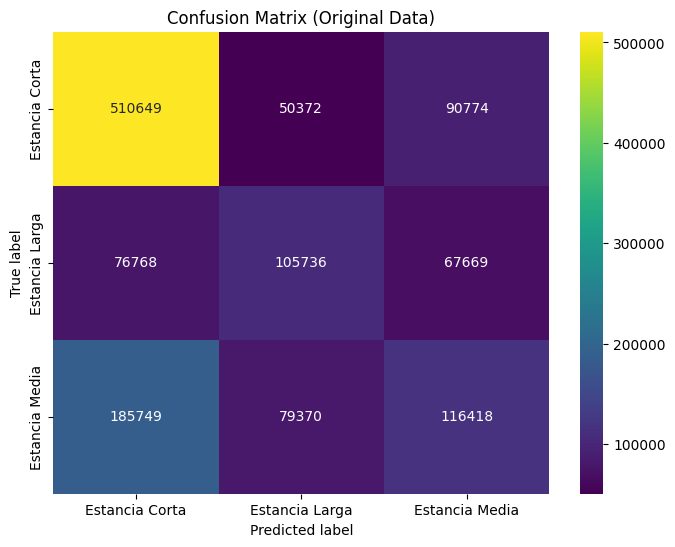

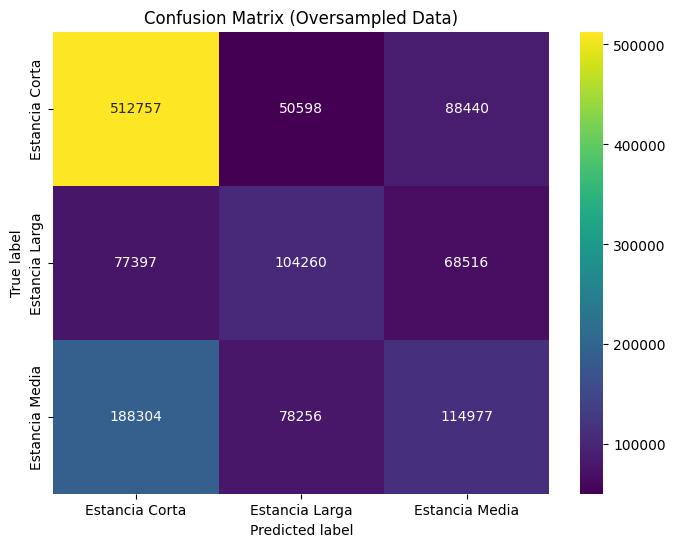

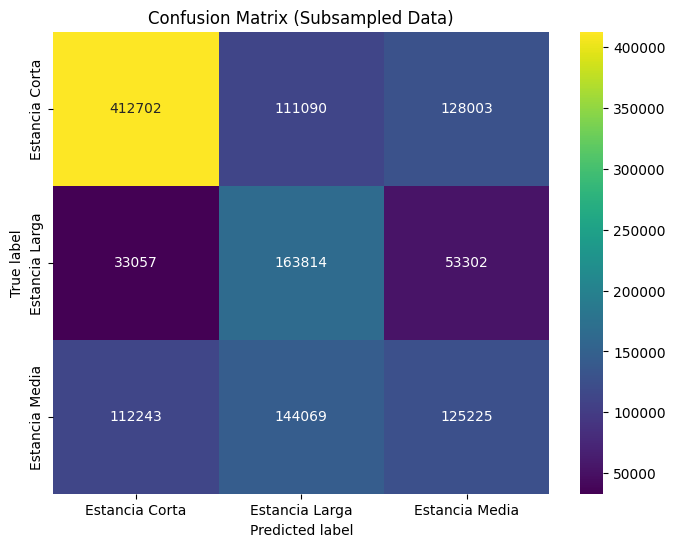

In [263]:
cm_orig = confusion_matrix(y_test, y_pred_knn_orig)
cm_over = confusion_matrix(y_test, y_pred_knn_over)
cm_subs = confusion_matrix(y_test, y_pred_knn_subs)

classes = unique_labels(y_test, y_pred_knn_orig, y_pred_knn_over, y_pred_knn_subs)

def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.show()

plot_confusion_matrix(cm_orig, 'Confusion Matrix (Original Data)')
plot_confusion_matrix(cm_over, 'Confusion Matrix (Oversampled Data)')
plot_confusion_matrix(cm_subs, 'Confusion Matrix (Subsampled Data)')

Entrenamiento de modelo Decision Tree en el conjunto de datos original.

In [266]:
best_params={'criterion': 'entropy', 'max_depth': 10}

clf_orig = DecisionTreeClassifier(**best_params)

clf_orig.fit(X_orig, y_orig)

y_pred_dt_orig = clf_orig.predict(X_test)

dt_acc_orig = accuracy_score(y_test, y_pred_dt_orig)

print("ORIGINAL::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_dt_orig))

ORIGINAL::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.68      0.80      0.73    651795
Estancia Larga       0.48      0.42      0.45    250173
Estancia Media       0.44      0.34      0.39    381537

      accuracy                           0.59   1283505
     macro avg       0.53      0.52      0.52   1283505
  weighted avg       0.57      0.59      0.57   1283505



Entrenamiento de modelo Decision Tree en el conjunto de datos oversampling.

In [267]:
best_params={'criterion': 'entropy', 'max_depth': 10}

clf_over = DecisionTreeClassifier(**best_params)

clf_over.fit(X_over, y_over)

y_pred_dt_over = clf_over.predict(X_test)

dt_acc_over = accuracy_score(y_test, y_pred_dt_over)

print("OVERSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_dt_over))

OVERSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.58      0.67    651795
Estancia Larga       0.39      0.77      0.51    250173
Estancia Media       0.42      0.34      0.38    381537

      accuracy                           0.55   1283505
     macro avg       0.53      0.56      0.52   1283505
  weighted avg       0.60      0.55      0.55   1283505



Entrenamiento de modelo Decision Tree en el conjunto de datos subsampling.

In [268]:
best_params={'criterion': 'gini', 'max_depth': 10}

clf_subs = DecisionTreeClassifier(**best_params)

clf_subs.fit(X_subs, y_subs)

y_pred_dt_subs = clf_subs.predict(X_test)

dt_acc_subs = accuracy_score(y_test, y_pred_dt_subs)

print("SUBSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_dt_subs))

SUBSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.58      0.67    651795
Estancia Larga       0.39      0.76      0.51    250173
Estancia Media       0.42      0.35      0.38    381537

      accuracy                           0.55   1283505
     macro avg       0.53      0.56      0.52   1283505
  weighted avg       0.60      0.55      0.55   1283505



Comparamos accuracy de los conjuntos

In [269]:
print("Accuracy (original):", dt_acc_orig)
print("Accuracy (oversampling):", dt_acc_over)
print("Accuracy (subsampling):", dt_acc_subs)

Accuracy (original): 0.5894071312538712
Accuracy (oversampling): 0.5462510858937051
Accuracy (subsampling): 0.5450364431770816


Para poder comparar de manera más visual los resultados del modelo, crearemos una matriz de confusión para cada conjunto de entrenamiento.

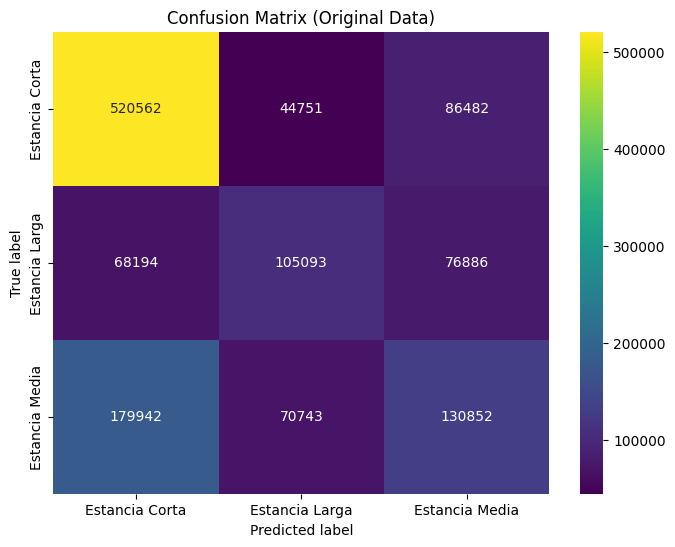

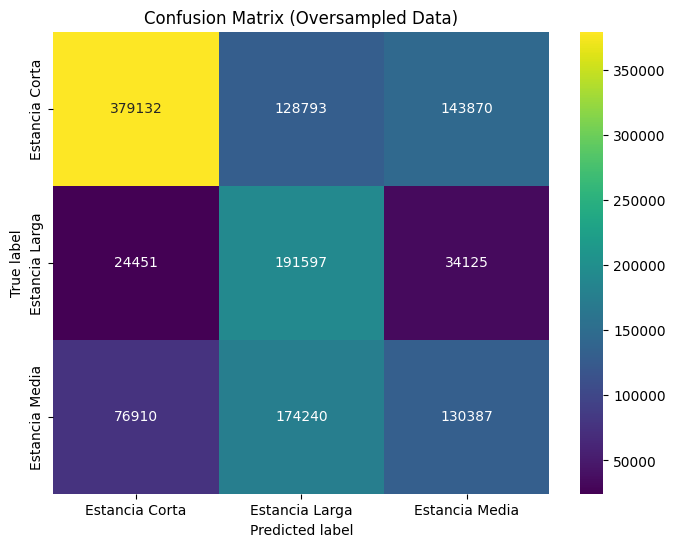

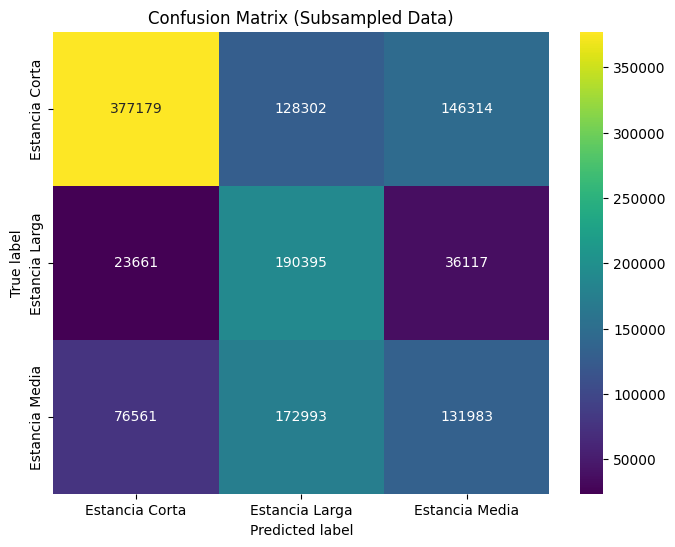

In [270]:
cm_orig = confusion_matrix(y_test, y_pred_dt_orig)
cm_over = confusion_matrix(y_test, y_pred_dt_over)
cm_subs = confusion_matrix(y_test, y_pred_dt_subs)

classes = unique_labels(y_test, y_pred_dt_orig, y_pred_dt_over, y_pred_dt_subs)

def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.show()

plot_confusion_matrix(cm_orig, 'Confusion Matrix (Original Data)')
plot_confusion_matrix(cm_over, 'Confusion Matrix (Oversampled Data)')
plot_confusion_matrix(cm_subs, 'Confusion Matrix (Subsampled Data)')

### Conclusión

Los modelos entrenados presentan dificultades para predecir estancias medias y largas. Uno de los principales causantes de esto es el claro desbalance de las clases. Aunque al aplicar técnicas de **oversampling** y **subsampling** se observa una mejora, aún se presentan deficiencias en la predicción.

Otros factores que influyen en este desempeño incluyen los modelos utilizados. A pesar de haber intentado aplicar técnicas como **Gradient Boosting** y **Support Vector Machine**, estas tomaban demasiado tiempo, por lo que se decidió no utilizarlas. Esto implica que algún algoritmo con mejores resultados podría no haber sido considerado. Adicionalmente, el modelo emplea muchas dimensiones, lo que puede hacer más difícil la clasificación, y puede que no hayamos considerado algunas características importantes. Por ejemplo, la variable **DIAG2** podría haber sido determinante, pero debido a que la mayoría de los pacientes tenía un valor **NaN** en esta variable, se optó por descartarla.

En resumen, la combinación de un desbalance de clases, la elección de modelos más simples por restricciones de tiempo, la maldición de la dimensionalidad y la posible exclusión de características relevantes, contribuye a la dificultad de los modelos para predecir con precisión las estancias medias y largas.

### Pasos a Futuro

Para mejorar los modelos en el futuro, se podrían tomar los siguientes pasos:

1. **Aplicar diversas técnicas de selección de características** para identificar los datos más determinantes.
2. **Investigar otras técnicas de balanceo de datos** o incluir datos de egresos reales, obtenidos de datasets de otros años, para generar un equilibrio en las clases objetivo.
3. **Utilización de otros modelos de clasificación** que no se hayan considerado anteriormente debido a restricciones de tiempo, optimizando su implementación para mejorar su eficiencia.
